<a href="https://colab.research.google.com/github/VoidEnd315/CNN/blob/main/simple_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3109 - loss: 1.8465 - val_accuracy: 0.4963 - val_loss: 1.3852
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5214 - loss: 1.3285 - val_accuracy: 0.5548 - val_loss: 1.2327
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5899 - loss: 1.1608 - val_accuracy: 0.6175 - val_loss: 1.0904
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6298 - loss: 1.0614 - val_accuracy: 0.6453 - val_loss: 1.0122
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6577 - loss: 0.9731 - val_accuracy: 0.6553 - val_loss: 0.9880
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6766 - loss: 0.9251 - val_accuracy: 0.6690 - val_loss: 0.9596
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6982 - loss: 0.8652 - val_accuracy: 0.6694 - val_loss: 0.9485
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7149 - loss: 0.8193 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted class: Horse
True class: Horse
y_test array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


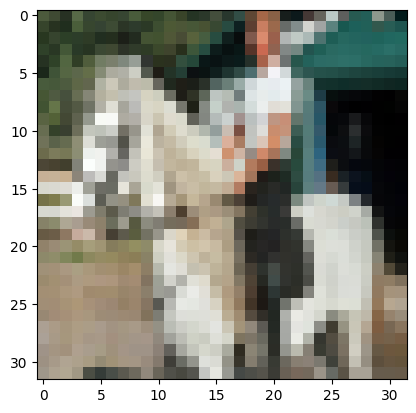

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
cifar10_labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]
# Make predictions
predictions = model.predict(x_test)
i = randint(0, len(x_test))
# Get predicted class for the i^th test image
predicted_class = np.argmax(predictions[i])

# Get predicted class for the i^th test image
print(f"Predicted class: {cifar10_labels[predicted_class]}")
j = np.where(y_test[i] > 0)[0][0]
print(f"True class: {cifar10_labels[j]}")
print(f"y_test array: {y_test[i]}")
plt.imshow(x_test[i])
plt.show()